In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier

* n_neighbors — количество  соседей, по умолчанию 5.
* weights{'uniform', 'distance'} — вес объекта в зависимости от удаленности от объекта. Как говорилось ранее, если uniform, то расстояние не будет учитываться в подсчёте вероятности для классификации. По умолчанию оно не учитывается, параметр имеет значение 'uniform'. При 'distance' расстояние учитывается.
* algorithm — алгоритм, используемый при подсчёте расстояния.
* 'ball_tree' использует BallTree.
* 'kd_tree' использует  KDTree.
* 'brute' использует жадный алгоритм.
* 'auto' выбирает оптимальный из вышепредставленных.
* leaf_size — параметр для поиска расстояния BallTree или KDTree. По умолчанию равен 30.
* p — значение p-метрики Миньковского. Как мы знаем,  — расстояние Манхэттена (L1),  — Евклидово расстояние (L2). По умолчанию .
* metric — метрика для оценки расстояний, по умолчанию расстояние Миньковского.
* n_jobs — количество задач, выполняемых параллельно, ограничено количеством ядер вычислительной машины. При n_jobs=-1 использует все.

In [3]:
# Сформируем искусственные данные: 
data = pd.DataFrame([[0,0,0],[0.2,0.1,0], [1,0,0], [2,1,1],[2.5,0.9,1], [3,1,1]], columns = ['x','y', 'target'])

# Отделим матрицу признаков и вектор-столбец правильных ответов: 
X = data.drop(['target'],axis = 1)
Y = data['target']

In [4]:
%%time
# Обучим kNN с тремя соседями:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y)

CPU times: total: 15.6 ms
Wall time: 3.02 ms


KNeighborsClassifier(n_neighbors=3)

Визуализацию ИД и работы модели по классификации точки. 

Вероятность принадлежности к классу можно вычислить методом predict_proba(), а само предсказание — методом predict:

In [8]:
# for item in np.linspace(0,3,10):
    x = item
    y = item*0.25
    plt.figure(figsize = (5,5))
    red = data[data.target == 1]
    blue = data[data.target == 0]
    red_prob = round(neigh.predict_proba([[x,y]])[0][1],2)*100 #вероятность принадлежности к красным
    blue_prob = round(neigh.predict_proba([[x,y]])[0][0],2)*100 #вероятность принадлежности к синим
    plt.title(f'Красный на {red_prob} %, синий на {blue_prob} %')
    plt.xlabel('значения признака x')
    plt.ylabel('значение признака y')
    plt.scatter(red.x.values,red.y.values ,c= 'r')
    plt.scatter(blue.x.values,blue.y.values ,c= 'b')
    plt.scatter(x,y ,c= 'g')
    plt.grid()
    plt.show()

IndentationError: unexpected indent (247359997.py, line 2)

Как можно видеть, когда зеленая точка «улетает» из кластера синих точек, вероятность падает, при этом вероятность принадлежности к классу в данном случае может принимать всего четыре значения (0, 0.33, 0.66, 1) в зависимости от количества соседей, так как не учтено расстояние при подсчёте вероятности. 

In [9]:
# Попробуем учесть расстояние. Для этого в модель подадим параметр weights='distance'.
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(X, Y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

### Задание 7.1

Какова вероятность принадлежности к нулевому классу объекта для модели 5 ближайших соседей без учёта расстояний до соседей, если в соседях — 4 представителя нулевого класса и 1 — единичного?

In [10]:
neigh_5 = KNeighborsClassifier(n_neighbors=5)
neigh_5.fit(X, Y)

KNeighborsClassifier()

**Примечание.** В случае задачи регрессии целевая метка нашего объекта определяется как среднее значение целевой метки по k ближайшим соседям.

Расчёты ведутся точно так же, только вместо вероятности предсказания класса высчитывается среднее по ближайшим соседям. Также при использовании взвешенного подхода, среднее уже будет взвешенным в зависимости от расстояния до соседа: чем ближе к точке, тем больший вклад соседа.

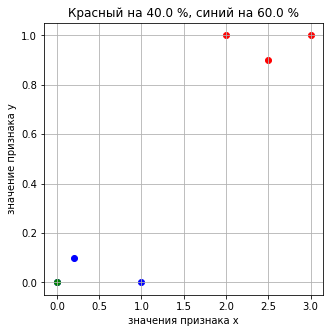

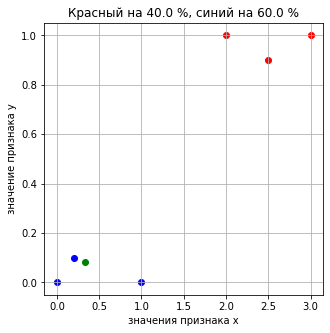

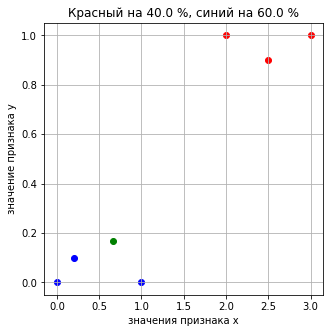

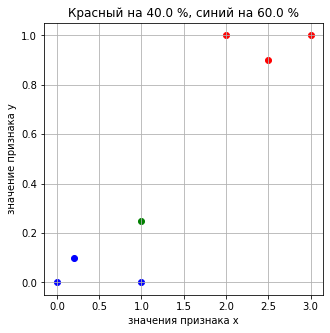

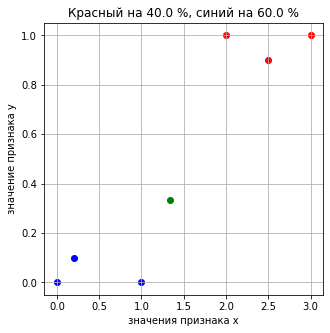

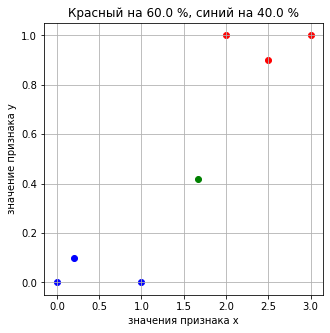

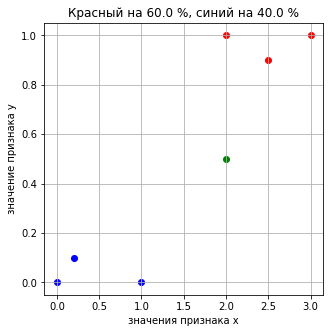

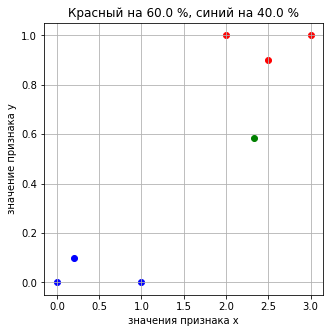

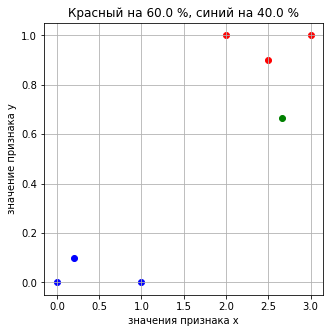

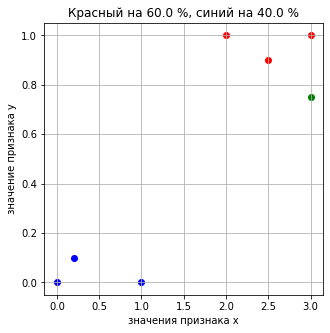

In [11]:
for item in np.linspace(0,3,10):
    x = item
    y = item*0.25
    plt.figure(figsize = (5,5))
    red = data[data.target == 1]
    blue = data[data.target == 0]
    red_prob = round(neigh_5.predict_proba([[x,y]])[0][1],2)*100 #вероятность принадлежности к красным
    blue_prob = round(neigh_5.predict_proba([[x,y]])[0][0],2)*100 #вероятность принадлежности к синим
    plt.title(f'Красный на {red_prob} %, синий на {blue_prob} %')
    plt.xlabel('значения признака x')
    plt.ylabel('значение признака y')
    plt.scatter(red.x.values,red.y.values ,c= 'r')
    plt.scatter(blue.x.values,blue.y.values ,c= 'b')
    plt.scatter(x,y ,c= 'g')
    plt.grid()
    plt.show()